In [1]:
import numpy as np
import schemdraw
import schemdraw.elements as elm

In [ ]:
# Physical Constants
epsilon_0 = 8.854e-12  # Vacuum permittivity (F/m)

# Model Electrode

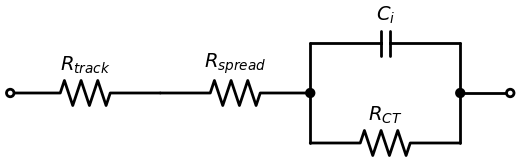

In [3]:
with schemdraw.Drawing() as d:
    d.config(unit=3)

    d += elm.Dot(open=True)  # left terminal
    d += elm.Resistor().label("$R_{track}$")  # r_track
    d += elm.Resistor().label("$R_{spread}$")  # r_spread

    left_node = d.add(elm.Dot())  # branch point

    # capacitive branch
    d += elm.Line().down().length(1).at(left_node.center)
    d += elm.Resistor().right().length(3).label("$R_{CT}$")
    d += elm.Line().up().length(1)

    # resistive branch (faradaic)
    d += elm.Line().up().length(1).at(left_node.center)
    d += elm.Capacitor().right().length(3).label("$C_i$")
    d += elm.Line().down().length(1)

    right_term = d.add(elm.Dot())  # end branch point

    d += elm.Line().right().length(1)
    d += elm.Dot(open=True)  # right terminal

fig = d.draw()

# Electrode interface
$$C_i = C_H + C_{GC}$$
$$\frac{1}{C_1} = \underbrace{t_{dl} (\epsilon_0 \epsilon_r)^{-1}}_{C_H} + \underbrace{L_D (\epsilon_0 \epsilon_r)^{-1} cosh^{-1} (\frac{z \cdot E_p}{2 \cdot V_t})}_{C_{GC}}$$
$$L_D = \sqrt{\frac{\epsilon_0 \epsilon_r V_t}{2 n^0 z^2 q}}$$

| Parameter | Value |
| --------- | ----- |
| $t_dl$    | $5 \cdot 10^{10}$ m |
| $z$       | $4$   |
| $V_t$     | $0.0259$ V |
|$n^0$      | $93 \cdot 10^{25}$ ions/$m^3$|
| q         | $1.602 \cdot 10^{-19}$ C |

Equations and reference values from [Franks et al., 2005](https://doi.org/10.1109/tbme.2005.847523).

In [ ]:
def R_track(R_s, L, W):
    return R_s * (L / W)


def R_spread(rho_medium, r):
    return (rho_medium) / (4 * r)


def C_H(t_dl, epsilon_r):
    C_H = (epsilon_0 * epsilon_r) / t_dl
    return C_H


def C_GC(epsilon_r, L_D, z, V_t, potential):
    C_GC = (
        epsilon_0 * epsilon_r * np.cosh((z * potential) / (2 * V_t))
        ) / (
        L_D * z * V_t
    )
    return C_GC


def L_D(epsilon_r, V_t, n0, z, q):
    L_D = np.sqrt(
        (epsilon_0 * epsilon_r * V_t) / (2 * n0 * z**2 * q)
    )
    return L_D


def C_i(C_H, C_GC):
    C_i = (C_H**-1 + C_GC**-1) ** -1
    return C_i


def Z_i(C_i, f, ESA):
    omega = 2 * np.pi * f
    Z_i = 1 / (1j * omega * C_i * ESA)

    return Z_i